# Classification

# Importing Packages

In [3]:
import os
os.chdir('/home/sivaram/Documents/java-projects/dltk-opensource/qubitai-dltk')

import dltk_ai
#from dltk_ai import data_preprocessing
from dltk_ai.dataset_types import Dataset
from getpass import getpass
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

New version of dltk_ai (1.0.4) available, you are still using older (1.0.3) version of the dltk_ai, Please update using "pip install qubitai-dltk==1.0.4"


# Initializing DLTK Client

In [4]:
api_key = getpass("Valid API key (default=None) : ") or None
base_url = input("Endpoint for openDLTK (default=http://localhost:5000) : ") or "http://localhost:5000"

client = dltk_ai.DltkAiClient(api_key, base_url)

Valid API key (default=None) : ········
Endpoint for openDLTK (default=http://localhost:5000) : https://dev-gcp-kong.dltk.ai


# Uploading Training Data

In [5]:
# upload training dataset using store function
train_data_store_response = client.store('/home/sivaram/Downloads/diabetes_train.csv', Dataset.TRAIN_DATA)
print(train_data_store_response)

# store file url in a variable to use in training.
train_data = train_data_store_response['fileUrl']
print(train_data)

Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings


{'id': 406832921608675, 'userId': 5155952328395496671, 'username': None, 'fileUrl': '/dltk-ai-dev/private/5155952328395496671/Train_Data/1625040368206_diabetes_train.csv', 's3Url': None, 'fileSize': 20608, 'fileName': 'diabetes_train.csv', 'label': 'Train_Data', 'type': 'FILE', 'isPublic': False, 'cloudfrontUrl': None, 'cloudfrontUrlSigned': None, 's3Key': 'private/5155952328395496671/Train_Data/1625040368206_diabetes_train.csv', 'metadata': {'attributes': ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Outcome_Category']}, 'fileSystem': 'GCP', 'projectId': 0, 'isDefault': False, 'createdAt': '2021-06-30T08:06:08.441+00:00', 'updatedAt': '2021-06-30T08:06:08.441+00:00'}
/dltk-ai-dev/private/5155952328395496671/Train_Data/1625040368206_diabetes_train.csv


# Uploading Prediction Data

In [6]:
# upload prediction dataset
test_file_store_response = client.store('/home/sivaram/Downloads/diabetes_test.csv', Dataset.TEST_DATA)
print(test_file_store_response)

# store file url in a variable to use while oredicting.
test_data = test_file_store_response['fileUrl']
print(test_data)

Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings


{'id': 233828962230525, 'userId': 5155952328395496671, 'username': None, 'fileUrl': '/dltk-ai-dev/private/5155952328395496671/Test_Data/1625040370743_diabetes_test.csv', 's3Url': None, 'fileSize': 5035, 'fileName': 'diabetes_test.csv', 'label': 'Test_Data', 'type': 'FILE', 'isPublic': False, 'cloudfrontUrl': None, 'cloudfrontUrlSigned': None, 's3Key': 'private/5155952328395496671/Test_Data/1625040370743_diabetes_test.csv', 'metadata': {'attributes': ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']}, 'fileSystem': 'GCP', 'projectId': 0, 'isDefault': False, 'createdAt': '2021-06-30T08:06:10.950+00:00', 'updatedAt': '2021-06-30T08:06:10.950+00:00'}
/dltk-ai-dev/private/5155952328395496671/Test_Data/1625040370743_diabetes_test.csv


# Define lib,task,algo and get hyper parameters

In [7]:
# Define the task - Classification/Regression
task = "classification"

# Library to use (scikit, weka, h2o)
library_1 = "weka"

#algorithm to use
algorithm_1 = "NaiveBayesMultinomial"

#hyper_parameters
from dltk_ai import helper
helper.get_ml_model_info('hyperparameters',library_1,task,algorithm_1)

Supported hyperparameters for NAIVEBAYESMULTINOMIAL algorithm in WEKA library are: 
 
Parameter                                              Default Value                 
-output-debug-info                                     False                         
-do-not-check-capabilities                             False                         
-num-decimal-places                                    2                             
-batch-size                                            100                           

for more info please refer https://javadoc.io/static/nz.ac.waikato.cms.weka/weka-stable/3.8.3/weka/classifiers/bayes/NaiveBayesMultinomial.html


# Define HyperParameters

In [8]:
naive_hyper_parameters_1 = {'-output-debug-info': True,'-do-not-check-capabilities': False,'-num-decimal-places': 3,'-batch-size': 50}
naive_hyper_parameters_2 = {'-output-debug-info': True,'-do-not-check-capabilities': False,'-num-decimal-places': 1,'-batch-size': 10}

# Model 1

In [9]:
# features to be used for training
features = ["Glucose","BloodPressure","Insulin","BMI", "DiabetesPedigreeFunction","Age"]

# Label to predict
label_1 = 'Outcome_Category'
# Train-test split percentage
train_percentage_1 = 80

# Save model 
save_model = "true"



# train function in dltk for model1
train_response_m1 = client.train(task, algorithm_1, train_data, label_1,features,"DiabetesDetection_m1", library_1, train_percentage_1, save_model,params=naive_hyper_parameters_1)
print(train_response_m1)




{'code': 200, 'data': {'jobId': 123787, 'appId': 1617777180849, 'projectId': 0, 'name': 'weka_classification_train', 'library': 'weka', 'service': 'Classification', 'task': 'TRAIN', 'state': 'RUN', 'startTime': '2021-06-30T08:06:40.178+00:00', 'endTime': None, 'request': {'library': 'weka', 'jobType': 'CSV', 'queryId': None, 'modelId': None, 'isSingle': False, 'singleRow': None, 'config': {'name': 'DiabetesDetection_m1', 'algorithm': 'NaiveBayesMultinomial', 'datasetUrl': '/dltk-ai-dev/private/5155952328395496671/Train_Data/1625040368206_diabetes_train.csv', 'label': 'Outcome_Category', 'trainPercentage': 80, 'features': ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 'saveModel': True, 'params': {'-output-debug-info': True, '-do-not-check-capabilities': False, '-num-decimal-places': 3, '-batch-size': 50}, 'folds': 5, 'crossValidation': False, 'evalPlots': False}}, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isSingle': False, 'isJobStopp

# Model 2

In [10]:
# features to be used for training
features = ["Glucose","BloodPressure","Insulin","BMI", "DiabetesPedigreeFunction","Age"]

# Label to predict
label_1 = 'Outcome_Category'
# Train-test split percentage
train_percentage_1 = 80

# Save model 
save_model = "true"


# train function in dltk
train_response_m2 = client.train(task, algorithm_1, train_data, label_1,features,"DiabetesDetection_m1", library_1, train_percentage_1, save_model,params=naive_hyper_parameters_2)
print(train_response_m2)

{'code': 200, 'data': {'jobId': 123788, 'appId': 1617777180849, 'projectId': 0, 'name': 'weka_classification_train', 'library': 'weka', 'service': 'Classification', 'task': 'TRAIN', 'state': 'RUN', 'startTime': '2021-06-30T08:06:48.558+00:00', 'endTime': None, 'request': {'library': 'weka', 'jobType': 'CSV', 'queryId': None, 'modelId': None, 'isSingle': False, 'singleRow': None, 'config': {'name': 'DiabetesDetection_m1', 'algorithm': 'NaiveBayesMultinomial', 'datasetUrl': '/dltk-ai-dev/private/5155952328395496671/Train_Data/1625040368206_diabetes_train.csv', 'label': 'Outcome_Category', 'trainPercentage': 80, 'features': ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 'saveModel': True, 'params': {'-output-debug-info': True, '-do-not-check-capabilities': False, '-num-decimal-places': 1, '-batch-size': 10}, 'folds': 5, 'crossValidation': False, 'evalPlots': False}}, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isSingle': False, 'isJobStopp

# Checking training status for Model1

In [11]:
train_job_status_response_m1 = client.job_status(train_response_m1['data']['jobId'])
print(train_job_status_response_m1)
print(json.dumps(train_job_status_response_m1, indent=2))

{'jobId': 123787, 'appId': 1617777180849, 'projectId': 0, 'name': 'weka_classification_train', 'library': 'weka', 'service': 'Classification', 'task': 'TRAIN', 'state': 'FINISH', 'startTime': '2021-06-30T08:06:40.178+00:00', 'endTime': None, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isSingle': False, 'isJobStopped': None, 'automateJobId': None, 'output': None}
{
  "jobId": 123787,
  "appId": 1617777180849,
  "projectId": 0,
  "name": "weka_classification_train",
  "library": "weka",
  "service": "Classification",
  "task": "TRAIN",
  "state": "FINISH",
  "startTime": "2021-06-30T08:06:40.178+00:00",
  "endTime": null,
  "isStreamJob": false,
  "jobType": "CSV",
  "queryId": null,
  "isSingle": false,
  "isJobStopped": null,
  "automateJobId": null,
  "output": null
}


# Checking training status for Model2 

In [12]:
train_job_status_response_m2 = client.job_status(train_response_m2['data']['jobId'])
print(train_job_status_response_m2)
print(json.dumps(train_job_status_response_m2, indent=2))

{'jobId': 123788, 'appId': 1617777180849, 'projectId': 0, 'name': 'weka_classification_train', 'library': 'weka', 'service': 'Classification', 'task': 'TRAIN', 'state': 'FINISH', 'startTime': '2021-06-30T08:06:48.558+00:00', 'endTime': None, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isSingle': False, 'isJobStopped': None, 'automateJobId': None, 'output': None}
{
  "jobId": 123788,
  "appId": 1617777180849,
  "projectId": 0,
  "name": "weka_classification_train",
  "library": "weka",
  "service": "Classification",
  "task": "TRAIN",
  "state": "FINISH",
  "startTime": "2021-06-30T08:06:48.558+00:00",
  "endTime": null,
  "isStreamJob": false,
  "jobType": "CSV",
  "queryId": null,
  "isSingle": false,
  "isJobStopped": null,
  "automateJobId": null,
  "output": null
}


# Checking Output of Model1

In [13]:
# Evaluation metrics - model 1
train_job_output_response_m1 = client.job_output(train_response_m1['data']['jobId'])
train_job_output_response_m1

{'id': 82255,
 'jobId': 123787,
 'output': {'eval': {'kappa': 0.06250000000000006,
   'recall': {'No': 0.5897435897435898, 'Yes': 0.47619047619047616},
   'correct': 66.0,
   'accuracy': 55.0,
   'rocCurve': {'values': [[1.0, 1.0],
     [0.9762, 1.0],
     [0.9524, 1.0],
     [0.9286, 1.0],
     [0.9286, 0.9872],
     [0.9286, 0.9744],
     [0.9286, 0.9615],
     [0.9048, 0.9615],
     [0.881, 0.9615],
     [0.8571, 0.9615],
     [0.8571, 0.9487],
     [0.8571, 0.9359],
     [0.8571, 0.9231],
     [0.8333, 0.9231],
     [0.8333, 0.9103],
     [0.8095, 0.9103],
     [0.8095, 0.8974],
     [0.8095, 0.8846],
     [0.7857, 0.8846],
     [0.7857, 0.8718],
     [0.7619, 0.8718],
     [0.7381, 0.8718],
     [0.7381, 0.859],
     [0.7143, 0.859],
     [0.7143, 0.8462],
     [0.7143, 0.8333],
     [0.6905, 0.8333],
     [0.6905, 0.8205],
     [0.6905, 0.8077],
     [0.6905, 0.7949],
     [0.6905, 0.7821],
     [0.6905, 0.7692],
     [0.6905, 0.7564],
     [0.6905, 0.7436],
     [0.6667, 0.7436]

# Checking Output of Model2

In [14]:
# Evaluation metrics - model 2
train_job_output_response_m2 = client.job_output(train_response_m2['data']['jobId'])
train_job_output_response_m2

{'id': 82256,
 'jobId': 123788,
 'output': {'eval': {'kappa': 0.23214285714285726,
   'recall': {'No': 0.7105263157894737, 'Yes': 0.5227272727272727},
   'correct': 77.0,
   'accuracy': 64.16666666666667,
   'rocCurve': {'values': [[1.0, 1.0],
     [1.0, 0.9868],
     [0.9773, 0.9868],
     [0.9773, 0.9737],
     [0.9545, 0.9737],
     [0.9545, 0.9605],
     [0.9318, 0.9605],
     [0.9318, 0.9474],
     [0.9318, 0.9342],
     [0.9318, 0.9211],
     [0.9091, 0.9211],
     [0.8864, 0.9211],
     [0.8636, 0.9211],
     [0.8409, 0.9211],
     [0.8182, 0.9211],
     [0.8182, 0.9079],
     [0.7955, 0.9079],
     [0.7955, 0.8947],
     [0.7955, 0.8816],
     [0.7727, 0.8816],
     [0.75, 0.8816],
     [0.7273, 0.8816],
     [0.7273, 0.8684],
     [0.7045, 0.8684],
     [0.6818, 0.8684],
     [0.6591, 0.8684],
     [0.6364, 0.8684],
     [0.6364, 0.8553],
     [0.6364, 0.8421],
     [0.6136, 0.8421],
     [0.6136, 0.8289],
     [0.5909, 0.8289],
     [0.5909, 0.8158],
     [0.5682, 0.8158],
  

# Confusion Matrix of Model1 and Model2

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


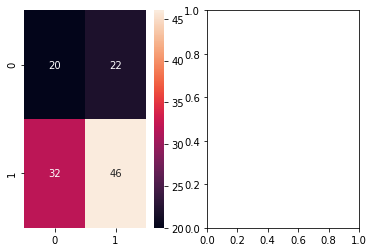

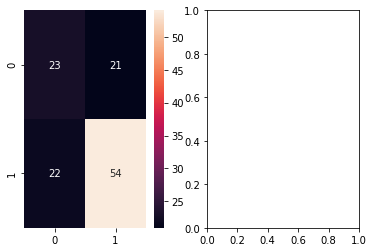

In [16]:
confusion_matrix_list_m1 = train_job_output_response_m1['output']['eval']['confusionMatrix']
# confusion_matrix_list_m3 = train_job_output_response_m3['output']['eval']['confusionMatrix']


fig1, ax1 =plt.subplots(1,2)

sns.heatmap(confusion_matrix_list_m1, annot=True, ax=ax1[0],label="model_1",fmt='g')
# sns.heatmap(confusion_matrix_list_m3, annot=True, ax=ax[1],label="model_3",fmt='g')


fig1.show()

confusion_matrix_list_m2 = train_job_output_response_m2['output']['eval']['confusionMatrix']
# confusion_matrix_list_m3 = train_job_output_response_m3['output']['eval']['confusionMatrix']


fig2, ax2 =plt.subplots(1,2)

sns.heatmap(confusion_matrix_list_m2, annot=True, ax=ax2[0],label="model_1",fmt='g')
# sns.heatmap(confusion_matrix_list_m3, annot=True, ax=ax[1],label="model_3",fmt='g')


fig2.show()

# ROC Curve of Model1 and Model2

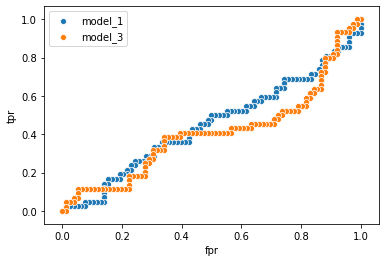

In [17]:
# Model 1 - RoC Curve
roc_values_list_m1 = train_job_output_response_m1['output']['eval']['rocCurve']['values']

roc_df_m1 = pd.DataFrame(roc_values_list_m1,columns=['tpr','fpr'])
sns.scatterplot(data=roc_df_m1, x=roc_df_m1['fpr'], y=roc_df_m1['tpr'], label='model_1')

# Model 2 - RoC Curve

roc_values_list_m2 = train_job_output_response_m2['output']['eval']['rocCurve']['values']

roc_df_m2 = pd.DataFrame(roc_values_list_m2,columns=['tpr','fpr'])
sns.scatterplot(data=roc_df_m2, x=roc_df_m2['fpr'], y=roc_df_m2['tpr'], label='model_3')

# Regression

# Importing Packages

In [18]:
import os
os.chdir('/home/sivaram/Documents/java-projects/dltk-opensource/qubitai-dltk')
import json

import dltk_ai
#from dltk_ai import data_preprocessing
from dltk_ai.dataset_types import Dataset
from getpass import getpass

# Initialize Client

In [23]:
api_key = getpass("Valid API key (default=None) : ") or None
base_url = input("Endpoint for openDLTK (default=http://localhost:5000) : ") or "http://localhost:5000"

client = dltk_ai.DltkAiClient(api_key, base_url)

Valid API key (default=None) : ········
Endpoint for openDLTK (default=http://localhost:5000) : https://dev-gcp-kong.dltk.ai


# Upload Train Data

In [24]:
# Upload Train dataset
train_data_store_response = client.store('/home/sivaram/Downloads/boston_train.csv', Dataset.TRAIN_DATA)
print(train_data_store_response)
train_data = train_data_store_response['fileUrl']

Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings


{'id': 519228662039648, 'userId': 5155952328395496671, 'username': None, 'fileUrl': '/dltk-ai-dev/private/5155952328395496671/Train_Data/1625041671951_boston_train.csv', 's3Url': None, 'fileSize': 28116, 'fileName': 'boston_train.csv', 'label': 'Train_Data', 'type': 'FILE', 'isPublic': False, 'cloudfrontUrl': None, 'cloudfrontUrlSigned': None, 's3Key': 'private/5155952328395496671/Train_Data/1625041671951_boston_train.csv', 'metadata': {'attributes': ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']}, 'fileSystem': 'GCP', 'projectId': 0, 'isDefault': False, 'createdAt': '2021-06-30T08:27:52.218+00:00', 'updatedAt': '2021-06-30T08:27:52.218+00:00'}


# Upload Test Data

In [25]:
# Upload Train dataset
prediction_data_store_response = client.store('/home/sivaram/Downloads/boston_test.csv', Dataset.TEST_DATA)
print(prediction_data_store_response)
prediction_data = prediction_data_store_response['fileUrl']

Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings


{'id': 820775443138140, 'userId': 5155952328395496671, 'username': None, 'fileUrl': '/dltk-ai-dev/private/5155952328395496671/Test_Data/1625041674122_boston_test.csv', 's3Url': None, 'fileSize': 6667, 'fileName': 'boston_test.csv', 'label': 'Test_Data', 'type': 'FILE', 'isPublic': False, 'cloudfrontUrl': None, 'cloudfrontUrlSigned': None, 's3Key': 'private/5155952328395496671/Test_Data/1625041674122_boston_test.csv', 'metadata': {'attributes': ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']}, 'fileSystem': 'GCP', 'projectId': 0, 'isDefault': False, 'createdAt': '2021-06-30T08:27:54.328+00:00', 'updatedAt': '2021-06-30T08:27:54.328+00:00'}


# Define lib,task,algo and get hyper parameters

In [26]:
# Define the task - Classification/Regression
task = "regression"

# Library to use (scikit, weka, h2o)
library_1 = "weka"

#algorithm to use
algorithm_1 = "LinearRegression"

#hyper_parameters
from dltk_ai import helper
helper.get_ml_model_info('hyperparameters',library_1,task,algorithm_1)

Supported hyperparameters for LINEARREGRESSION algorithm in WEKA library are: 
 
Parameter                                              Default Value                 
-S                                                     0                             
-C                                                     False                         
-R                                                     8e-08                         
-minimal                                               False                         
-additional-stats                                      False                         
-output-debug-info                                     False                         
-do-not-check-capabilities                             False                         

for more info please refer https://javadoc.io/static/nz.ac.waikato.cms.weka/weka-stable/3.8.3/weka/classifiers/functions/LinearRegression.html


# Define HyperParameters

In [27]:
linear_hyper_params_1 = {'-S': 2, '-C': True, '-R': 0.00001, '-minimal': False, '-additional-stats': True, '-output-debug-info': False, '-do-not-check-capabilities': False}
linear_hyper_params_2 = {'-S': 1, '-C': True, '-R': 0.1, '-minimal': False, '-additional-stats': True, '-output-debug-info': False, '-do-not-check-capabilities': False}

# Train Model 1

In [34]:
# features to be used for training
features = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

# Label to predict
label = 'MEDV'

# Train-test split percentage
train_percentage_1 = 60

# Save model 
save_model = True

train_response_m1 = client.train(task, algorithm_1, train_data, label,features,"House Price Prediction Model M1", library_1, train_percentage_1, save_model,params=linear_hyper_params_2)
print(train_response_m1)

{'code': 0, 'data': {'jobId': 123807, 'appId': 1617777180849, 'projectId': 0, 'name': 'weka_regression_train', 'library': 'weka', 'service': 'Regression', 'task': 'TRAIN', 'state': 'RUN', 'startTime': '2021-06-30T08:29:26.849+00:00', 'endTime': None, 'request': {'library': 'weka', 'jobType': 'CSV', 'queryId': None, 'modelId': None, 'isSingle': False, 'singleRow': None, 'config': {'name': 'House Price Prediction Model M1', 'algorithm': 'LinearRegression', 'datasetUrl': '/dltk-ai-dev/private/5155952328395496671/Train_Data/1625041671951_boston_train.csv', 'label': 'MEDV', 'trainPercentage': 60, 'features': ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'], 'saveModel': True, 'params': {'-S': 1, '-C': True, '-R': 0.1, '-minimal': False, '-additional-stats': True, '-output-debug-info': False, '-do-not-check-capabilities': False}, 'folds': 5, 'crossValidation': False, 'evalPlots': False}}, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isSingle': False, 'isJobStopped

# Train Model2

In [35]:
# features to be used for training
features = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

# Label to predict
label = 'MEDV'

# Train-test split percentage
train_percentage_1 = 60

# Save model 
save_model = True

train_response_m2 = client.train(task, algorithm_1, train_data, label,features,"House Price Prediction Model M1", library_1, train_percentage_1, save_model,params=linear_hyper_params_2)
print(train_response_m1)

{'code': 0, 'data': {'jobId': 123807, 'appId': 1617777180849, 'projectId': 0, 'name': 'weka_regression_train', 'library': 'weka', 'service': 'Regression', 'task': 'TRAIN', 'state': 'RUN', 'startTime': '2021-06-30T08:29:26.849+00:00', 'endTime': None, 'request': {'library': 'weka', 'jobType': 'CSV', 'queryId': None, 'modelId': None, 'isSingle': False, 'singleRow': None, 'config': {'name': 'House Price Prediction Model M1', 'algorithm': 'LinearRegression', 'datasetUrl': '/dltk-ai-dev/private/5155952328395496671/Train_Data/1625041671951_boston_train.csv', 'label': 'MEDV', 'trainPercentage': 60, 'features': ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'], 'saveModel': True, 'params': {'-S': 1, '-C': True, '-R': 0.1, '-minimal': False, '-additional-stats': True, '-output-debug-info': False, '-do-not-check-capabilities': False}, 'folds': 5, 'crossValidation': False, 'evalPlots': False}}, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isSingle': False, 'isJobStopped

# Status of Model1

In [36]:
import json
train_job_status_response_m1 = client.job_status(train_response_m1['data']['jobId'])
print(train_job_status_response_m1)
print(json.dumps(train_job_status_response_m1, indent=2))

{'jobId': 123807, 'appId': 1617777180849, 'projectId': 0, 'name': 'weka_regression_train', 'library': 'weka', 'service': 'Regression', 'task': 'TRAIN', 'state': 'FINISH', 'startTime': '2021-06-30T08:29:26.849+00:00', 'endTime': None, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isSingle': False, 'isJobStopped': None, 'automateJobId': None, 'output': None}
{
  "jobId": 123807,
  "appId": 1617777180849,
  "projectId": 0,
  "name": "weka_regression_train",
  "library": "weka",
  "service": "Regression",
  "task": "TRAIN",
  "state": "FINISH",
  "startTime": "2021-06-30T08:29:26.849+00:00",
  "endTime": null,
  "isStreamJob": false,
  "jobType": "CSV",
  "queryId": null,
  "isSingle": false,
  "isJobStopped": null,
  "automateJobId": null,
  "output": null
}


# Status of Model2

In [37]:
import json
train_job_status_response_m2 = client.job_status(train_response_m2['data']['jobId'])
print(train_job_status_response_m2)
print(json.dumps(train_job_status_response_m2, indent=2))

{'jobId': 123808, 'appId': 1617777180849, 'projectId': 0, 'name': 'weka_regression_train', 'library': 'weka', 'service': 'Regression', 'task': 'TRAIN', 'state': 'FINISH', 'startTime': '2021-06-30T08:29:29.378+00:00', 'endTime': None, 'isStreamJob': False, 'jobType': 'CSV', 'queryId': None, 'isSingle': False, 'isJobStopped': None, 'automateJobId': None, 'output': None}
{
  "jobId": 123808,
  "appId": 1617777180849,
  "projectId": 0,
  "name": "weka_regression_train",
  "library": "weka",
  "service": "Regression",
  "task": "TRAIN",
  "state": "FINISH",
  "startTime": "2021-06-30T08:29:29.378+00:00",
  "endTime": null,
  "isStreamJob": false,
  "jobType": "CSV",
  "queryId": null,
  "isSingle": false,
  "isJobStopped": null,
  "automateJobId": null,
  "output": null
}


# Output of Model1

In [38]:
# Model 1 Evaluation Metrics
train_job_output_response_m1 = client.job_output(train_response_m1['data']['jobId'])
train_job_output_response_m1

{'id': 82274,
 'jobId': 123807,
 'output': {'eval': {'errorRate': 5.186923622308299,
   'pearsonCorrelation': {'RM': 0.6887765503312057,
    'AGE': -0.4341855513163342,
    'DIS': 0.2722951895473972,
    'NOX': -0.44053221032325013,
    'TAX': -0.4609075903802717,
    'INDUS': -0.4796784093108114,
    'LSTAT': -0.7435231214033883,
    'PTRATIO': -0.5275872788338895}},
  'modelUrl': '/dltk-ai-dev/private/5155952328395496671/model/1625041767134_House_Price_Prediction_Model_M1_7779037024086794482.mdl',
  'evalPlots': None,
  'evalTrain': {'errorRate': 5.092138559235261,
   'pearsonCorrelation': {'RM': 0.6887765503312057,
    'AGE': -0.4341855513163342,
    'DIS': 0.2722951895473972,
    'NOX': -0.44053221032325013,
    'TAX': -0.4609075903802717,
    'INDUS': -0.4796784093108114,
    'LSTAT': -0.7435231214033883,
    'PTRATIO': -0.5275872788338895}}}}

# Output of Model2

In [39]:
# Model 1 Evaluation Metrics
train_job_output_response_m2 = client.job_output(train_response_m2['data']['jobId'])
train_job_output_response_m2

{'id': 82275,
 'jobId': 123808,
 'output': {'eval': {'errorRate': 5.2862639789568995,
   'pearsonCorrelation': {'RM': 0.6852773601104065,
    'AGE': -0.3890717038562938,
    'DIS': 0.2537143890820081,
    'NOX': -0.459537790602596,
    'TAX': -0.48065684093211974,
    'INDUS': -0.4812438455347526,
    'LSTAT': -0.7632384290993184,
    'PTRATIO': -0.5352122866849917}},
  'modelUrl': '/dltk-ai-dev/private/5155952328395496671/model/1625041769623_House_Price_Prediction_Model_M1_5408730130530847108.mdl',
  'evalPlots': None,
  'evalTrain': {'errorRate': 5.092138559235261,
   'pearsonCorrelation': {'RM': 0.6852773601104065,
    'AGE': -0.3890717038562938,
    'DIS': 0.2537143890820081,
    'NOX': -0.459537790602596,
    'TAX': -0.48065684093211974,
    'INDUS': -0.4812438455347526,
    'LSTAT': -0.7632384290993184,
    'PTRATIO': -0.5352122866849917}}}}